# Introduction to Jupyter
## A Python environment for data science

This short notebook will provide an introduction to several of the core functionalities of Jupyter notebooks.

* numpy: Matrix algebra and numerical methods.
* pandas: Data frames for manipulating and visualising data as tables.
* matplotlib: Everybody's favourite Python plotting library.
* seaborn: Statistical visualisation library built on matplotlib and pandas. Lots of high-level functions for data visualisation.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(context='notebook', style='white', font_scale=1.8)

In [2]:
%matplotlib inline

## Data exploration

Our data is stored in the file `data.csv`. Let's load our data into pandas directly.

In [3]:
all_data = pd.read_csv('./data.csv')

Jupyter renders dataframes as nice tables, allowing us to look at our data as soon as we load it.

In [4]:
all_data.head()

,Unnamed: 0,Height,Weight,Age,Eye colour
0,0,1.749672,89.656488,58.722554,Other
1,1,1.686174,72.742237,50.555579,Blue
2,2,1.764769,75.675282,57.458956,Other
3,3,1.852303,60.752518,55.582749,Other
4,4,1.676585,69.556173,43.111799,Other


Many of the plotting functions available through seaborn can operate directly on a pandas dataframe and use the row and column names to automatically annotate the plot. This is a very powerful way to rapidly visualise data during the exploration stage. Here we create a bar plot of the number of examples of each eye colour in the data set.

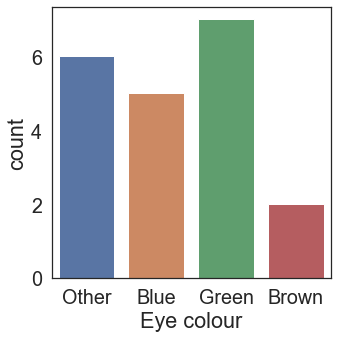

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
sns.countplot(data=all_data, x='Eye colour', ax=ax)

Let's now look at another plot, combining two of the features, eye colour and height, in the same plot.

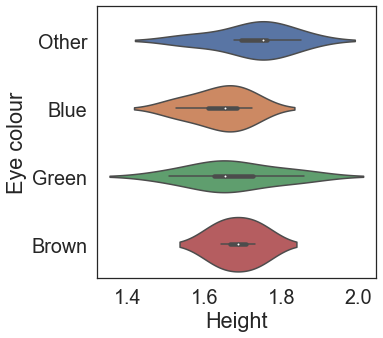

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
sns.violinplot(data=all_data, y='Eye colour', x='Height', ax=ax)

## Using existing code within a notebook

We can import a .py file as a module as usual:

In [7]:
import utils

Alternatively, we can run the contents of a .py file in a cell:

In [8]:
%run utils.py

<Figure size 432x288 with 0 Axes>

We can use all our usual IPython commands to explore our code.

Let's look at the `make_dummy_dataset` function in `utils.py` that was used to create our dataset.

In [9]:
utils.make_dummy_dataset?

Signature: utils.make_dummy_dataset(sample_size=20, seed=42)
Docstring:
Creates a dummy dataset.

Args:
    sample_size (int, optional): Number of samples in dataset
    seed (int, optional): Seed for random number generator
    
Returns:
    dataset (pandas.DataFrame object): A dataframe containing the dataset.
File:      c:\users\fergus\documents\github_projects\reproducible-computational-workflows\3-jupyter\utils.py
Type:      function


If we want to build on existing code, we can load the contents of a .py file into a cell. We can then save our changes if we want to modify the original file.

Let's try this with the file `utils.py`:

In [10]:
all_data = utils.make_dummy_dataset()

In [11]:
all_data.to_csv("./data.csv")

In [12]:
%load utils.py

Now that we've edited our data creation function, let's create some new data with that function and visualise the result.

In [13]:
all_data_new = utils.make_dummy_dataset()

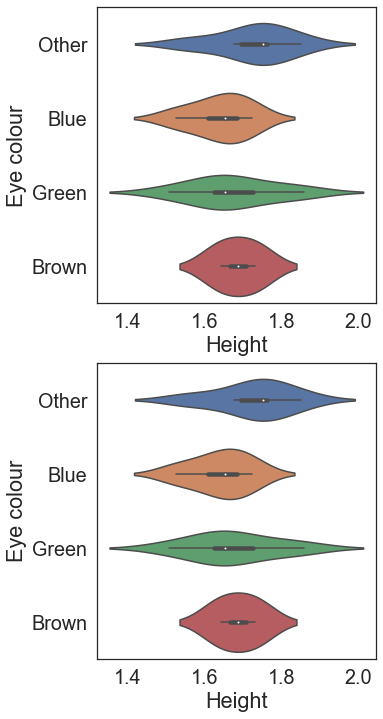

In [14]:
fig =  plt.figure(figsize=(5, 12))
ax = fig.add_subplot(211)
sns.violinplot(data=all_data, y='Eye colour', x='Height', ax=ax)
ax = fig.add_subplot(212)
sns.violinplot(data=all_data_new, y='Eye colour', x='Height', ax=ax)